In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Team Casimir Food Price Versus Stores Notebook
This is a supplementary notebook that has select visualizations comparing price data across stores in our analysis.

In [37]:
food_price_data = pd.read_csv('./food_prices.csv')
food_price_data.head()

,Food item,GTIN/UPC of TJs,Price at TJs ($),Quantity,Unit,Brand/Type at TJs,GTIN/UPC of Safeway,Price at Safeway ($),Quantity,Unit.1,...,GTIN/UPC of Berkeley Bowl,Price at Berkeley Bowl ($),Quantity.1,Unit.2,Brand/Type at Berkeley Bowl,GTIN/UPC of Whole Foods,Price at Whole Foods ($),Quantity.2,Unit.3,Brand/Type at Whole Foods
0,Bread,740661,4.49,24.00,oz,Sprouted Wheat Sourdough Bread,21130183432,4.99,24.00,oz,...,73130002602,7.69,20.0,oz,Oroweat Organic Thin-Sliced Rustic White Bread...,71214161580,5.99,12.0,oz,Soft & Delicious White Sandwich Bread
1,Rice,17400118006,3.29,3.00,lb,TJs Jasmine Rice,21130502097,6.79,5.00,lb,...,688267090882,2.09,1.0,lb,White Basmati Rice,17400118006,3.69,1.0,lb,Organic White Long Grain Rice
2,Pasta,323673,1.99,1.00,lb,Organic Fusilli Corti Bucati Pasta,21130507368,1.50,16.00,oz,...,76808006575,2.59,16.0,oz,Barilla Spaghetti Pasta,748023090072,1.59,16.0,oz,"Pasta, Spaghetti"
3,Apples,887434088381,1.29,0.33,lb,Honeycrisp Apples,887434088381,2.00,0.33,lb,...,887434088381,1.59,1.0,lb,Honeycrip Apples,887434088381,2.49,1.0,lb,Honeycrisp Apples
4,Tomatoes,21130338023,2.99,1.00,lb,TJs Campari Tomatoes,21130338023,3.49,1.00,lb,...,21130338023,1.59,1.0,lb,Roma Tomatoes,21130338023,2.99,1.0,lb,Roma Tomato


In [39]:
food_categories = {
    'Meats': ['Chicken', 'Beef', 'Pork', 'Turkey', 'Salmon', 'Tuna'],  # Example items
    'Dairy': ['Milk', 'Cheese', 'Yogurt'],
    'Eggs': ['Eggs'],
    'Legumes and Nuts': ['Beans', 'Lentils', 'Peanuts', 'Almonds', 'Nuts'],
    'Vegetables': ['Tomato', 'Lettuce', 'Carrot', 'Broccoli', 'Spinach', 'Peppers', 'Onions', 'Vegetables'],
    'Fruits': ['Apple', 'Banana', 'Orange', 'Berries', 'Fruits'],
    'Grains': ['Bread', 'Rice', 'Pasta', 'Wheat', 'Oats', 'Grains']
}

In [41]:
# Adjust the categorization function to handle non-string values safely
def categorize_food_safe(item_name):
    if pd.isnull(item_name) or not isinstance(item_name, str):
        return 'Others'  # Handle missing or non-string food item names
    for category, keywords in food_categories.items():
        if any(keyword.lower() in item_name.lower() for keyword in keywords):
            return category
    return 'Others'  # Default category if no match is found

# Re-apply the categorization function to the food items
food_price_data['Category'] = food_price_data['Food item'].apply(categorize_food_safe)

# Re-display the distribution of categories to check the categorization
category_distribution = food_price_data['Category'].value_counts()
category_distribution

Category
Others              30
Vegetables           5
Meats                5
Grains               3
Dairy                3
Legumes and Nuts     3
Fruits               1
Eggs                 1
Name: count, dtype: int64

In [43]:
food_price_data.head()

,Food item,GTIN/UPC of TJs,Price at TJs ($),Quantity,Unit,Brand/Type at TJs,GTIN/UPC of Safeway,Price at Safeway ($),Quantity,Unit.1,...,Price at Berkeley Bowl ($),Quantity.1,Unit.2,Brand/Type at Berkeley Bowl,GTIN/UPC of Whole Foods,Price at Whole Foods ($),Quantity.2,Unit.3,Brand/Type at Whole Foods,Category
0,Bread,740661,4.49,24.00,oz,Sprouted Wheat Sourdough Bread,21130183432,4.99,24.00,oz,...,7.69,20.0,oz,Oroweat Organic Thin-Sliced Rustic White Bread...,71214161580,5.99,12.0,oz,Soft & Delicious White Sandwich Bread,Grains
1,Rice,17400118006,3.29,3.00,lb,TJs Jasmine Rice,21130502097,6.79,5.00,lb,...,2.09,1.0,lb,White Basmati Rice,17400118006,3.69,1.0,lb,Organic White Long Grain Rice,Grains
2,Pasta,323673,1.99,1.00,lb,Organic Fusilli Corti Bucati Pasta,21130507368,1.50,16.00,oz,...,2.59,16.0,oz,Barilla Spaghetti Pasta,748023090072,1.59,16.0,oz,"Pasta, Spaghetti",Grains
3,Apples,887434088381,1.29,0.33,lb,Honeycrisp Apples,887434088381,2.00,0.33,lb,...,1.59,1.0,lb,Honeycrip Apples,887434088381,2.49,1.0,lb,Honeycrisp Apples,Fruits
4,Tomatoes,21130338023,2.99,1.00,lb,TJs Campari Tomatoes,21130338023,3.49,1.00,lb,...,1.59,1.0,lb,Roma Tomatoes,21130338023,2.99,1.0,lb,Roma Tomato,Vegetables


In [45]:
# Define a function to convert all prices to price per standard unit
def standardize_price(row, unit_col_suffixes, price_col_prefixes, standard_units):
    # For each store, adjust the price based on quantity and standard unit
    for price_prefix in price_col_prefixes:
        for unit_suffix in unit_col_suffixes:
            # Identify the columns for price, quantity, and unit for each store
            price_col = f'{price_prefix} {unit_suffix}'.strip()
            quantity_col = f'Quantity{unit_suffix}'.strip()
            unit_col = f'Unit{unit_suffix}'.strip()
            
            # Skip if any column is missing
            if price_col not in row or quantity_col not in row or unit_col not in row:
                continue
            
            # Get the current unit and quantity
            current_unit = row[unit_col]
            quantity = row[quantity_col]
            if pd.isnull(quantity) or pd.isnull(current_unit):
                continue  # Skip if quantity or unit is missing
            
            # Convert price to float and remove currency symbols
            try:
                price = float(row[price_col].replace('$', ''))
            except:
                continue  # Skip if price conversion fails
            
            # Determine the standard unit for this item's category
            standard_unit = standard_units.get(row['Category'], 'each')  # Default to 'each'
            
            # Convert quantities to standard unit (assuming 16 oz in a lb for simplicity)
            if current_unit == 'oz' and standard_unit == 'lb':
                quantity_in_standard_unit = quantity / 16.0
            elif current_unit == 'lb' and standard_unit == 'lb':
                quantity_in_standard_unit = quantity
            elif current_unit == 'each' and standard_unit == 'each':
                quantity_in_standard_unit = quantity
            else:
                quantity_in_standard_unit = quantity  # No conversion needed for other cases
            
            # Calculate price per standard unit and update the dataframe
            if quantity_in_standard_unit > 0:
                price_per_standard_unit = price / quantity_in_standard_unit
                row[price_col] = price_per_standard_unit
    
    return row

In [47]:

# Define standard units for each category (simplified for this example)
standard_units = {
    'Meats': 'lb',
    'Dairy': 'lb',
    'Eggs': 'doz',  # Assuming all egg prices are given per dozen, even though it's not explicitly stated
    'Legumes and Nuts': 'lb',
    'Vegetables': 'lb',
    'Fruits': 'each',
    'Grains': 'lb'
}

# Unit and price column suffixes and prefixes
unit_col_suffixes = ['', '.1', '.2', '.3']
price_col_prefixes = ['Price at TJs', 'Price at Safeway', 'Price at Berkeley Bowl ($)', 'Price at Whole Foods']


In [49]:
# Apply the standardization function to each row
food_price_data_standardized = food_price_data.apply(lambda row: standardize_price(row, unit_col_suffixes, price_col_prefixes, standard_units), axis=1)

# Display the first few rows of the updated dataframe to verify the changes
food_price_data_standardized.head()

,Food item,GTIN/UPC of TJs,Price at TJs ($),Quantity,Unit,Brand/Type at TJs,GTIN/UPC of Safeway,Price at Safeway ($),Quantity,Unit.1,...,Price at Berkeley Bowl ($),Quantity.1,Unit.2,Brand/Type at Berkeley Bowl,GTIN/UPC of Whole Foods,Price at Whole Foods ($),Quantity.2,Unit.3,Brand/Type at Whole Foods,Category
0,Bread,740661,4.49,24.00,oz,Sprouted Wheat Sourdough Bread,21130183432,4.99,24.00,oz,...,7.69,20.0,oz,Oroweat Organic Thin-Sliced Rustic White Bread...,71214161580,5.99,12.0,oz,Soft & Delicious White Sandwich Bread,Grains
1,Rice,17400118006,3.29,3.00,lb,TJs Jasmine Rice,21130502097,6.79,5.00,lb,...,2.09,1.0,lb,White Basmati Rice,17400118006,3.69,1.0,lb,Organic White Long Grain Rice,Grains
2,Pasta,323673,1.99,1.00,lb,Organic Fusilli Corti Bucati Pasta,21130507368,1.50,16.00,oz,...,2.59,16.0,oz,Barilla Spaghetti Pasta,748023090072,1.59,16.0,oz,"Pasta, Spaghetti",Grains
3,Apples,887434088381,1.29,0.33,lb,Honeycrisp Apples,887434088381,2.00,0.33,lb,...,1.59,1.0,lb,Honeycrip Apples,887434088381,2.49,1.0,lb,Honeycrisp Apples,Fruits
4,Tomatoes,21130338023,2.99,1.00,lb,TJs Campari Tomatoes,21130338023,3.49,1.00,lb,...,1.59,1.0,lb,Roma Tomatoes,21130338023,2.99,1.0,lb,Roma Tomato,Vegetables


In [51]:
# Prepare data for plotting
# Extract relevant columns for plotting: store names, price, and category
plot_data = pd.melt(food_price_data_standardized, 
                    id_vars=['Food item', 'Category'], 
                    value_vars=['Price at TJs ($)', 'Price at Safeway ($)', 'Price at Berkeley Bowl ($)', 'Price at Whole Foods ($)'],
                    var_name='Store', value_name='Price')


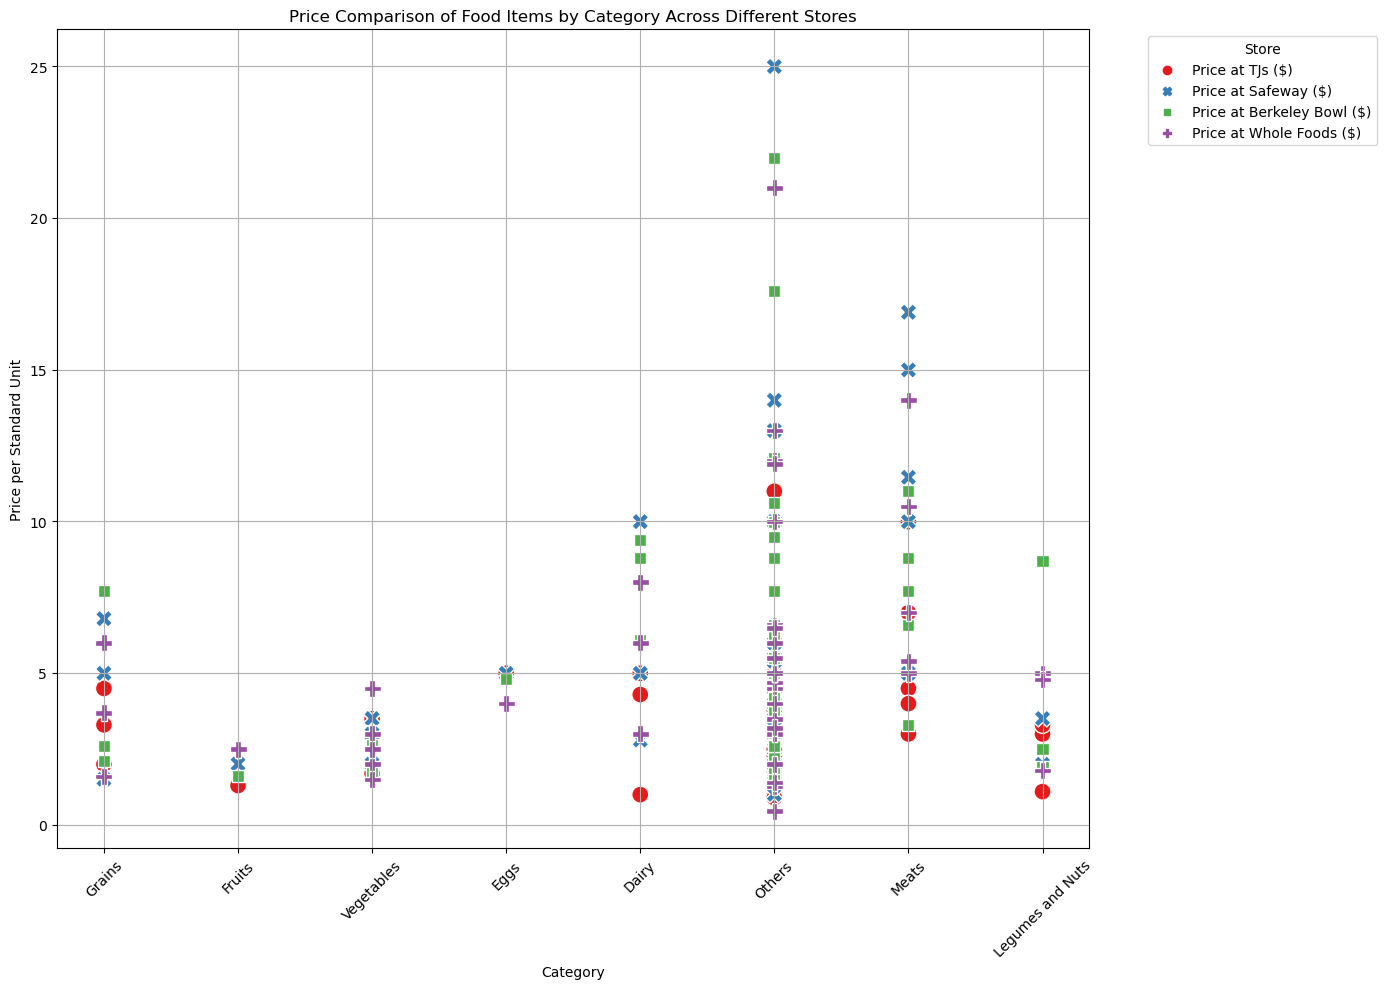

In [53]:
plot_data['Store'] = plot_data['Store'].replace({
    'Trader Joes': 'TJs',
    'Berkeley Bowl': 'Berkeley Bowl',  # Adjusting for consistency
    'Whole Foods': 'Whole Foods',      # Adjusting for consistency
})

# Plotting with the new specifications
plt.figure(figsize=(14, 10))
sns.scatterplot(data=plot_data, x='Category', y='Price', hue='Store', style='Store', palette='Set1', s=150)
plt.title('Price Comparison of Food Items by Category Across Different Stores')
plt.ylabel('Price per Standard Unit')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)  # Adding grid for better readability
plt.show()